# Large Sample Theory


## Convergence in Probability

Definition (Convergence in probability)
: A sequence ${X_n}$ of random variables converges in probability towards the random variable $X$ if for all $\varepsilon > 0$,

  $$
  \lim _{n \rightarrow \infty} \operatorname{P}\left(\left|X_{n}-X\right|>\varepsilon\right)=0
  $$

In short, we write $X_{n} \stackrel{P}{\rightarrow} X$ or $\operatorname{plim} X_{n}=X$.

**Properties**

1. $\operatorname{plim} \frac{X_n}{Y_n}   = \frac{\operatorname{plim} X_n }{\operatorname{plim} Y_n }$

1. $\operatorname{plim} X_nY_n  = \operatorname{plim} X_n  \operatorname{plim} Y_n$

1. $\operatorname{plim} (X_n+Y_n)  = \operatorname{plim} X_n  + \operatorname{plim} Y_n$

1. $\operatorname{plim} g(X_n)  = g(\operatorname{plim} X_n )$ if $g$ if is continuous at $\operatorname{plim} X_n$



## Law of Large Numbers

The Law of Large Numbers states that, as the number of identically distributed, randomly generated variables increases, their sample mean (average) approaches their theoretical mean.


### Weak Law of Large Numbers

Let $X_1, \ldots, X_n$ be independently and identically distributed random variables with mean $\mu$ and variance $\sigma^{2}<\infty$.
Then for every $\epsilon>0$,

$$
\lim_{n\rightarrow\infty}\mathrm{P}\left(\left|\bar{X}_{n}-\mu\right|<\epsilon\right)=1
$$

i.e. the sample mean converge in probability to the theoretical mean $\mu$,

$$
\bar{X}_{n}\overset{\mathcal{P}}{\rightarrow}\mu \quad \text{as}\ n\rightarrow \infty
$$

It leaves open the possibility that $\left|\overline{X}_{n}-\mu \right|>\epsilon$  happens an **infinite** number of times,

To prove it, by Chebychev's Inequality,

$$
\mathrm{P}\left(\left|\bar{X}_{n}-\mu\right|\geq\epsilon\right)
=\mathrm{P}\left(\left(\bar{X}_{n}-\mu\right)^{2}\geq\epsilon^{2}\right)
\leq\frac{\mathrm{E}\left(\bar{X}_{n}-\mu\right)^{2}}{\epsilon^{2}}
=\frac{\operatorname{Var}\bar{X}_{\mathfrak{H}}}{\epsilon^{2}}=\frac{\sigma^{2}}{n\epsilon^{2}} \rightarrow 0
$$



### Strong Law of Large Numbers

Let $X_1, \ldots, X_n$ be independently and identically distributed random variables with mean $\mu$ and variance $\sigma^{2}<\infty$.
Then for every $\epsilon>0$,

$$
\mathrm{P}\left(\lim_{n\rightarrow\infty}\left|\bar{X}_{n}-\mu\right|<\epsilon\right)=1
$$

i.e. the sample mean converge to the theoretical mean $\mu$ almost surely,

$$
\bar{X}_{n}\overset{a.s.}{\rightarrow}\mu \quad \text{as} \ n\rightarrow \infty
$$

```{note}
- Converge almost surely is a stronger condition than converge in probability.
- In some cases, the strong law does not hold, but the weak law does.
```

## Central Limit Theorem

The Central Limit Theorem, in probability theory, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed.

There are many versions of CLT with various problem settings. Here we introduce Lindeberg–Lévy CLT.

Let $X_1, \ldots, X_n$ be a sequence of independently and identically distributed random variables such that
$\mathrm{E}\left( X_{i} \right)=\mu$, $\mathrm{Var}\left( X_{i} \right)=\sigma^{2}>0$. Let $G_{n}(x)$ denote
the CDF of $\frac{\sqrt{n}\left(\bar{X}_{n}-\mu\right)}{\sigma}$,
then

$$
\lim_{n\rightarrow\infty}G_{n}(x)=\Phi(x)
$$

i.e., the normalized sample mean converge in distribution to a standard normal random variable,


$$
\frac{\sqrt{n}\left(\bar{X}_{n}-\mu\right)}{\sigma}\overset{\mathcal{D}}{\rightarrow}N(0,1)
$$

The Central Limit Theorem implies that we can obtain a normal distribution from a uniform random variable generator. Let  $X\sim U(0,1)$, then $\mu = \mathrm{E}\left( X \right) =\frac{1}{2}$, $\sigma = \sqrt{\mathrm{Var}\left(X \right)} = \sqrt{\frac{1}{12}}$. Hence,

$$
Y_n=\frac{\sqrt{n}\left(\bar{X}_{n}-\mu\right)}{\sigma}\overset{\mathcal{D}}{\rightarrow}N(0,1)
$$

Implementation with Python:

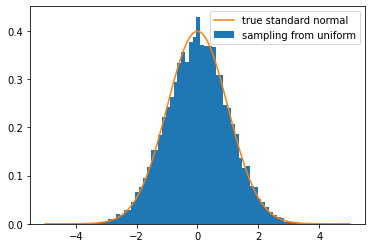

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n = 10000 # sample size
m = 10000 # number of samples
means = np.random.rand(m, n).mean(axis=1)
std_means = np.sqrt(n) * (means - 0.5) / np.sqrt(1/12)

points = np.linspace(-5, 5, 100)
true = norm.pdf(points)

plt.hist(std_means, bins='auto', density=True, label='sampling from uniform')
plt.plot(points, true, label='true standard normal')
plt.legend()
plt.show()

In general, one can then sample from any normal distribution $N(a,b^2)$ by the transformation $Z = bY_n+a$.